+ Title: Time Series Visualization in Python
+ Author: Gaurav Modi
+ Date: 2018-04-01
+ Modified: 2018-04-01
+ Description: "Time Series Visualization in Python"
+ Slug: time_series_visualization_python
+ Tags:time_series, python, visualization

+ Data Source: https://www.kaggle.com/sudalairajkumar/indian-startup-funding/data
+ Notebook on Kaggle: https://www.kaggle.com/modigaurav/time-series-analysis-and-exploration-in-python

### Importing Libraries

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn;

%matplotlib inline

### Reading data

In [2]:
date_parser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y')


df = pd.read_csv('../data/startup_funding.csv', date_parser=date_parser, parse_dates=['Date'], 
                 thousands=',')
df.drop(['SNo'], axis=1, inplace=True)

### Data headshot

In [3]:
df.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN


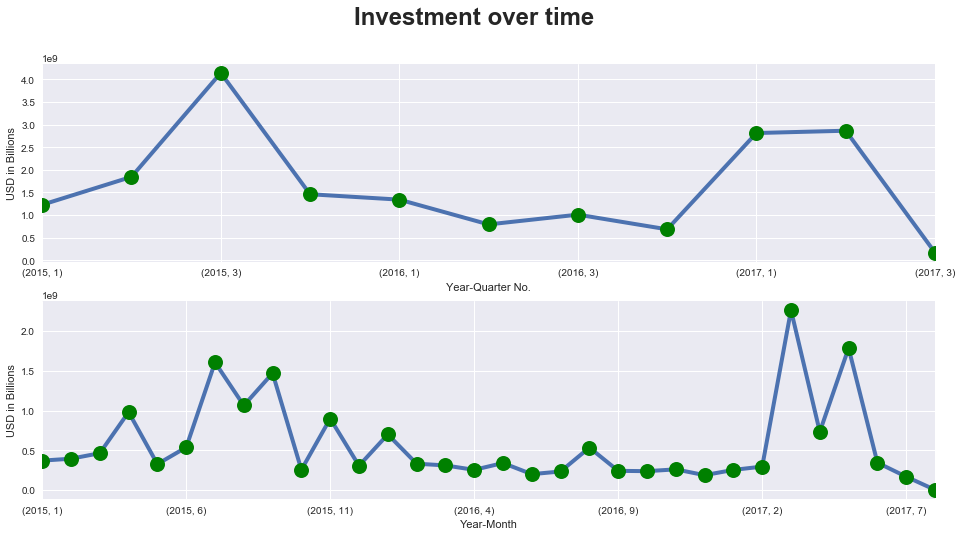

In [4]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Investment over time', fontsize=24, fontweight='bold')
ax = fig.add_subplot(211)
ts1 = df.groupby([df['Date'].dt.year, df['Date'].dt.quarter]).agg({'AmountInUSD':'sum'})['AmountInUSD']
ts1.plot(linewidth=4, marker="o", markersize=15, markerfacecolor='green')
plt.ylabel('USD in Billions')
plt.xlabel('Year-Quarter No.')
# plt.title('Total Investment over time')

ax = fig.add_subplot(212)
ts1 = df.groupby([df['Date'].dt.year, df['Date'].dt.month]).agg({'AmountInUSD':'sum'})['AmountInUSD']
ts1.plot(linewidth=4, marker="o", markersize=15, markerfacecolor='green')
plt.ylabel('USD in Billions')
plt.xlabel('Year-Month')

### Grouping by index of dataframe

In [5]:
df = df.set_index(['Date'])

df.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
Date,,,,,,,,
2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN


In [6]:
ts = df.groupby(['Date']).agg({'AmountInUSD':'sum'})['AmountInUSD']

In [7]:
ts.head()

Date
2015-01-02     2465000.0
2015-01-05    10515000.0
2015-01-06    11885000.0
2015-01-07     5155768.0
2015-01-09    13000000.0
Name: AmountInUSD, dtype: float64